## Imports

In [1]:
# Python standard library
import io
import os
import sys

# Scientific computing
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.misc
sys.path.append('../functions')
import functions



# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

## Load data

In [2]:
!ls ../img/insight

insight_0.jpg	 insight_1_2.png  insight_1_5.png  insight_2.jpg
insight_1_0.png  insight_1_3.png  insight_1_6.png  insight_3.jpg
insight_1_1.png  insight_1_4.png  insight_1.jpg


In [3]:
# The name of the image file to annotate
file_directory = '/home/prestonh/shelfy/img/insight/'
file_name = 'insight_1.jpg'
file_path = file_directory + file_name



# Instantiates a client
client = vision.ImageAnnotatorClient()



# Loads the image into memory
img_file = file_path
with io.open(img_file, 'rb') as image_file:
    content = image_file.read()
img_bin = types.Image(content=content)



# Ask for response; get response annotations
response = client.document_text_detection(image=img_bin)
texts = response.text_annotations

/home/prestonh/shelfy/img/insight/insight_1.jpg
(3120, 4160)


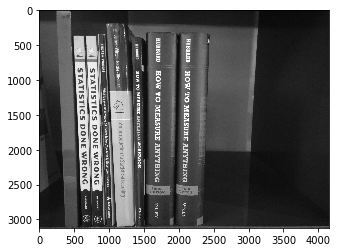

In [4]:
# The name of the image file to annotate
file_directory = '/home/prestonh/shelfy/img/insight/'
file_name = 'insight_1.jpg'
file_path = file_directory + file_name

# Load and look at the image
print(file_path)
img = cv2.imread(file_path, 0)

print(img.shape)


plt.imshow(img, cmap = 'gray')
plt.show()

# Instantiates a client
client = vision.ImageAnnotatorClient()

In [5]:
# Loads the image into memory

img_file = file_path
with io.open(img_file, 'rb') as image_file:
    content = image_file.read()
img_bin = types.Image(content=content)

## Find text

In [6]:
response = client.document_text_detection(image=img_bin)
texts = response.text_annotations
print('response type:', type(response))
print('texts type:', type(texts))

response type: <class 'google.cloud.vision_v1.types.AnnotateImageResponse'>
texts type: <class 'google.protobuf.pyext._message.RepeatedCompositeContainer'>


## Convert google to shelfy form

In [7]:
words = [functions.Word.FromGoogleText(text) for text in texts[1:]]

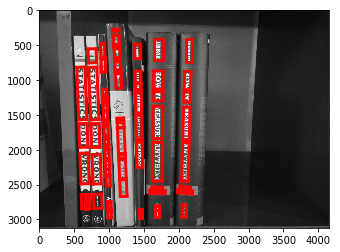

['HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'THIRD', 'EDITION', 'WILEY', 'HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'THIRD', 'EDITION', 'WILEY', 'WILEY', 'HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'WORKBOOK', '|', 'An', 'Introduction', 'to', 'Statistical', 'Learning', ':', 'James', '·', 'Witten', '·', 'Hastie', '·', 'Tibshirani', 'Addison', '-', 'Wesley', 'ANDREW', 'VICKERS', 'What', 'is', 'a', 'p', '-', 'value', 'anyway', '?', '34', 'Stories', 'To', 'Help', 'You', 'Actually', 'Understand', 'Statistics', 'DIT', 'STATISTICS', 'DONE', 'WRONG', 'REINHART', 'STATISTICS', 'DONE', 'WRONG', 'REINHART', 'REINHART']


In [8]:
functions.PlotBoxedImage_Words(img, words)
print([word.string for word in words])

## Filter words

In [9]:
def word_filter(word):
    # Length based filtering
    length_filter = len(word.string) > 1
    
    return length_filter

words = [word for word in words if word_filter(word)]
        

['HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'THIRD', 'EDITION', 'WILEY', 'HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'THIRD', 'EDITION', 'WILEY', 'WILEY', 'HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'WORKBOOK', 'An', 'Introduction', 'to', 'Statistical', 'Learning', 'James', 'Witten', 'Hastie', 'Tibshirani', 'Addison', 'Wesley', 'ANDREW', 'VICKERS', 'What', 'is', 'value', 'anyway', '34', 'Stories', 'To', 'Help', 'You', 'Actually', 'Understand', 'Statistics', 'DIT', 'STATISTICS', 'DONE', 'WRONG', 'REINHART', 'STATISTICS', 'DONE', 'WRONG', 'REINHART', 'REINHART']


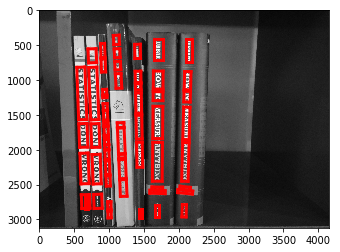

In [57]:
functions.PlotBoxedImage_Words(img, words, show = False)
plt.savefig()
plt.show()
print([word.string for word in words])

## Spine detection

#### Algorithmic approach

In [11]:
xcs = []
ycs = []
thetas = []

yc_tolerance = 100
theta_tolerance = 1000

matched_words = []
spines = []

for i, special_word in enumerate(words):
    matches = []
    # Check if word has already been matched
    if i in matched_words:
        continue
    
    for j, word in enumerate(words):
        
        
        
        # Don't match a word with itself
        if i == j:
            continue
            
        # Check if word has already been matched
        if j in matched_words:
            continue
                    
        x, y = word.bounding_box.Center()
        xc, yc = special_word.bounding_box.ImageToBoundingBoxCoordinateTransformation(x, y)
        theta = np.abs(word.bounding_box.VerticalAxisAngle() - special_word.bounding_box.VerticalAxisAngle())%(np.pi/2.)
        xcs.append(xc)
        ycs.append(yc)
        thetas.append(theta)

        
        #print(word.string)
        #print(xc, yc, theta)
        
        # If the difference in y value is below tolerance, append to the list of matches
        if np.abs(yc) < yc_tolerance and np.abs(theta) < theta_tolerance:
            if i not in matched_words:
                matched_words.append(i)
            matched_words.append(j)
            matches.append(j)
            
    spines.append(functions.Spine([special_word] + [words[match] for match in matches]))

['HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'THIRD', 'EDITION', 'WILEY']


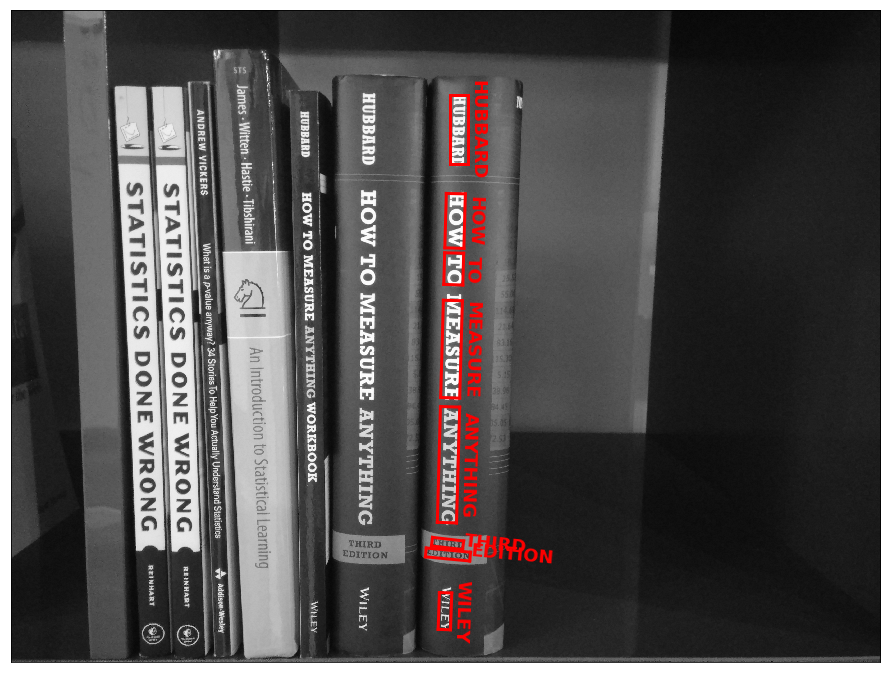

['HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'THIRD', 'EDITION', 'WILEY']


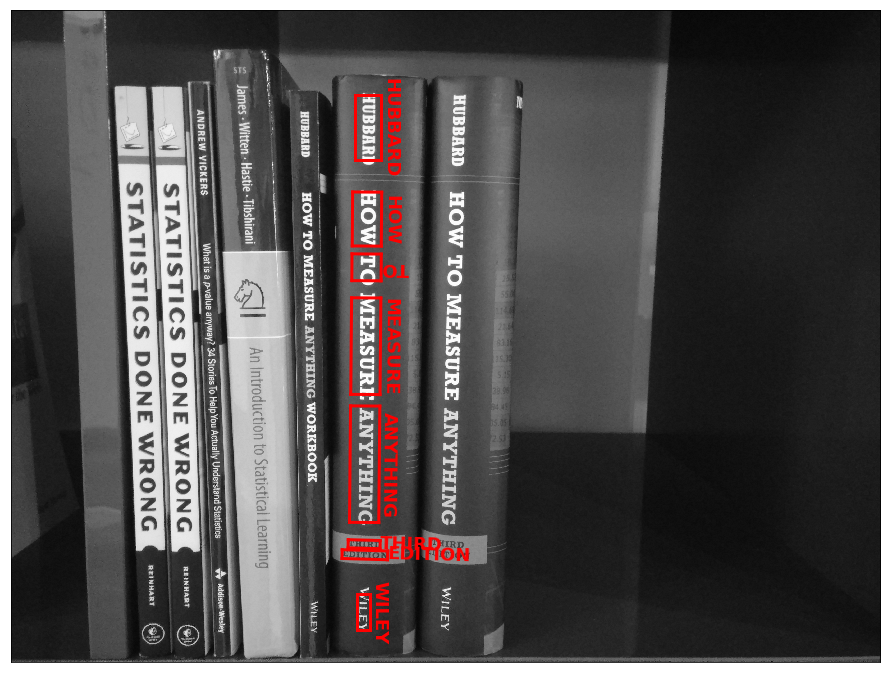

['HUBBARD', 'HOW', 'TO', 'MEASURE', 'ANYTHING', 'WORKBOOK', 'WILEY']


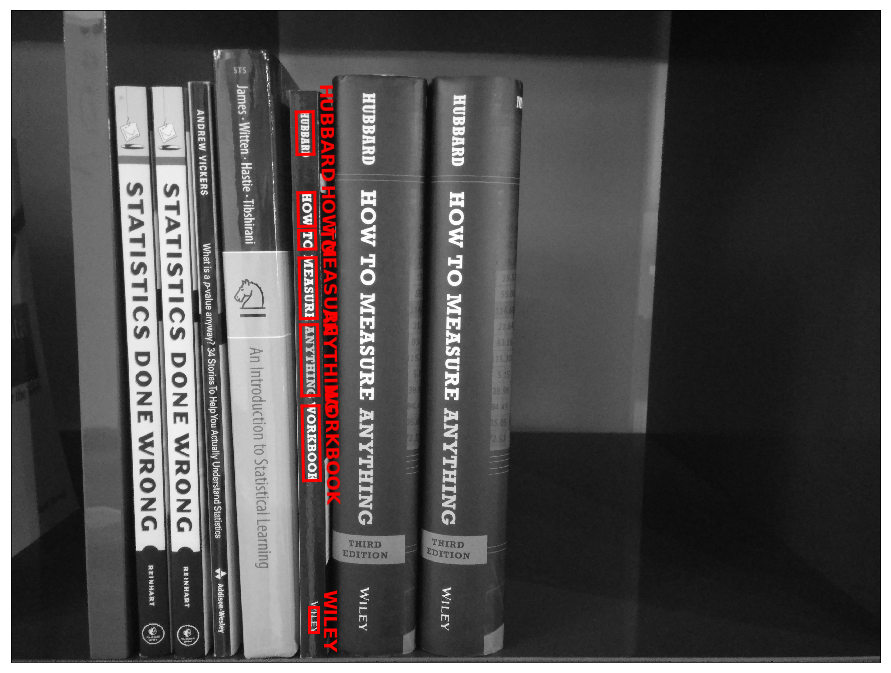

['James', 'Witten', 'Hastie', 'Tibshirani', 'An', 'Introduction', 'to', 'Statistical', 'Learning']


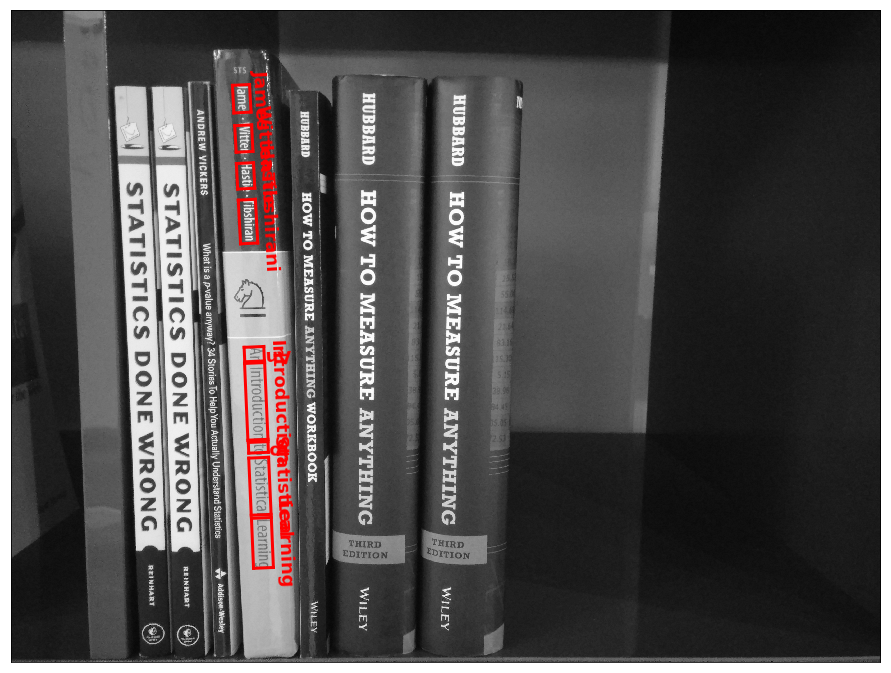

['ANDREW', 'VICKERS', 'What', 'is', 'value', 'anyway', '34', 'Stories', 'To', 'Help', 'You', 'Actually', 'Understand', 'Statistics', 'Addison', 'Wesley']


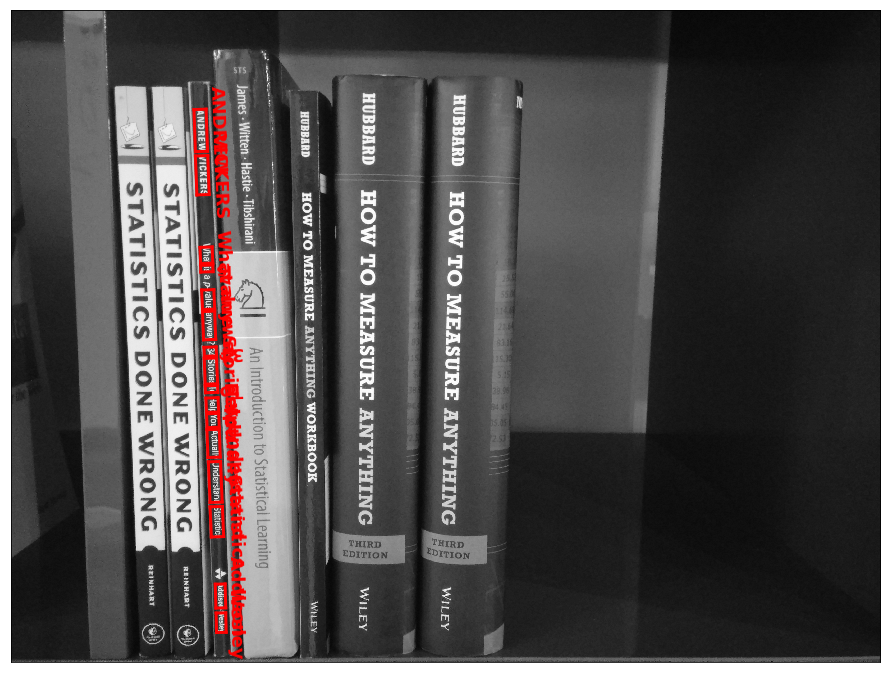

['DIT', 'STATISTICS', 'DONE', 'WRONG', 'REINHART']


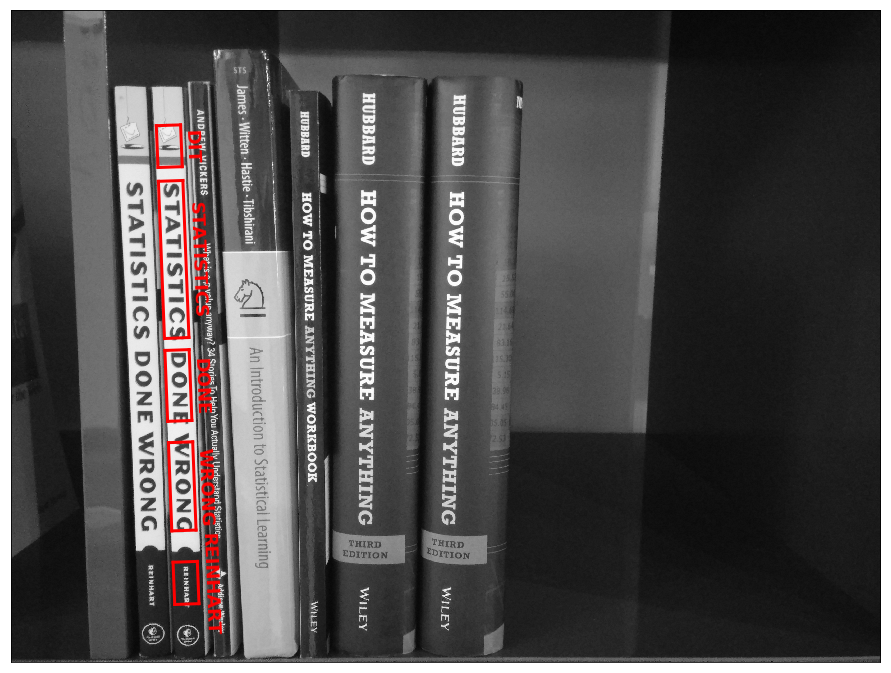

['STATISTICS', 'DONE', 'WRONG', 'REINHART', 'REINHART']


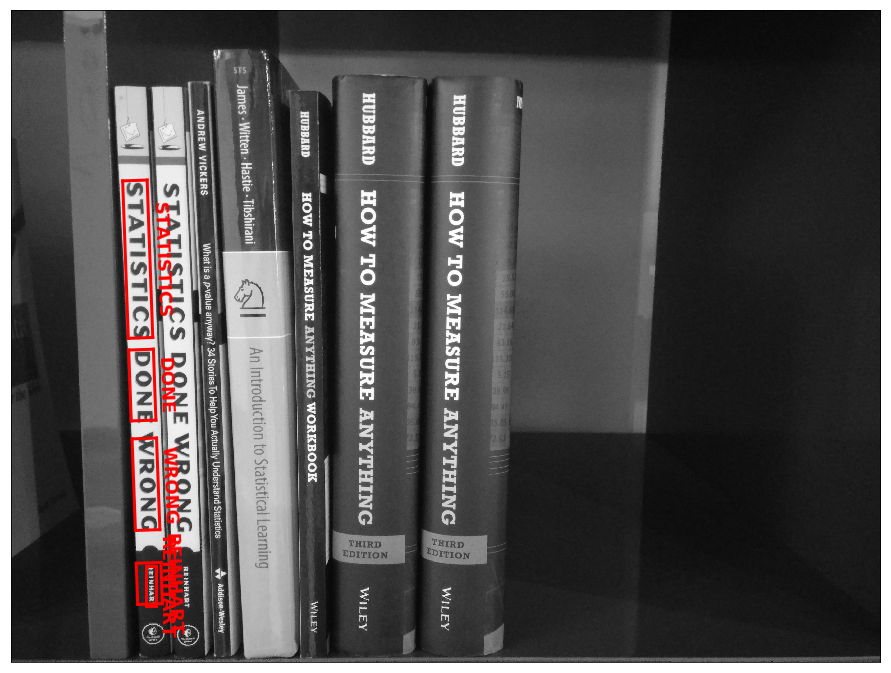

In [12]:
for i, spine in enumerate(spines):
    
    print([word.string for word in spine.words])
    fig = plt.figure(figsize = (16,12))
    functions.PlotAnnotatedImage_Words(img, [word for word in spine.words], show = False)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(file_path.replace('.jpg', '_' + str(i) + '.png'))
    plt.show()

In [13]:
for spine in spines:
    book_info = ''
    for word in spine.words:
        book_info += word.string + ' '
    print(book_info)

HUBBARD HOW TO MEASURE ANYTHING THIRD EDITION WILEY 
HUBBARD HOW TO MEASURE ANYTHING THIRD EDITION WILEY 
HUBBARD HOW TO MEASURE ANYTHING WORKBOOK WILEY 
James Witten Hastie Tibshirani An Introduction to Statistical Learning 
ANDREW VICKERS What is value anyway 34 Stories To Help You Actually Understand Statistics Addison Wesley 
DIT STATISTICS DONE WRONG REINHART 
STATISTICS DONE WRONG REINHART REINHART 


In [20]:
from bs4 import BeautifulSoup
import time
import requests

In [56]:
def GetGoogleSearchLink(search_query):
    return 'https://www.google.com/search?q='+search_query

def GetBookInfo(search_query):
    link = GetAmazonLinkFromGoogleSearch(search_query)
    return GetTitleFromAmazon(link)
    

def GetAmazonLinkFromGoogleSearch(search_query):
    
    # Perform google search
    link = GetGoogleSearchLink(search_query)
    
    ua = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}                                                                

    response = requests.get(link, headers=ua)
    content = response.content
    
    # Parse for amazon link
    soup = BeautifulSoup(content, 'html.parser')
    for link in soup.find_all('a'):
        url = link.get('href')
        if 'amazon' in str(url):
            return url
        
def GetTitleFromAmazon(url):
    ua = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.116 Safari/537.36'}                                                                
    response = requests.get(url, headers=ua)
    content = response.content

    # Parse for amazon link
    soup = BeautifulSoup(content, 'html.parser')
    
    
    
    # Title
    title = soup.find_all(id='productTitle')[0].contents[0]

    
    
    
    # Author
    author = soup.find_all(class_ = 'a-link-normal contributorNameID')[0].contents[0]
    
    
    
    
    
    
    # ISBN-13
    isbn_13 = soup.find_all(class_ = 'a-size-base a-color-base')[0].contents
    
    
    
    
    
    
    # ISBN-10
    isbn_10 = soup.find_all(class_ = 'a-size-base a-color-base')[1].contents
    
    
    
    
    
    
    return title, author
    return
        
        

for spine in spines:
    
    book_info = ''
    for word in spine.words:
        book_info += word.string + ' '
        
    time.sleep(1)
    print(book_info)
    print(GetBookInfo(book_info))
    break

HUBBARD HOW TO MEASURE ANYTHING THIRD EDITION WILEY 
('How to Measure Anything: Finding the Value of Intangibles in Business', 'Douglas W. Hubbard')
